In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
#Now, reload the dataset and change it into "numpy array".
dataset = np.loadtxt('C:\\Users\\aarus\\Downloads\\archive\\A_Z Handwritten Data.csv', delimiter=',')
#Dataset is split into 2 parts, training and testing...
X = dataset[:,0:784]
Y = dataset[:,0]
#Split the "X,Y" data into the ratio of 7:3, 3 is the test size. 
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.3, random_state=2)
#Reshape the data and change it into float 32 as usual.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
#The pixel of the data is comprised from 0 to 255. 0 is white,255 is black.
#Now normalize the data from 0 to 1 without some libraries, in a simple way.
X_train = X_train / 255
X_test = X_test / 255

In [3]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
#Classify 26 alphabets.
num_classes = Y_test.shape[1]

In [4]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
#Choose an optimizer and compile the model.
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
#And print the summary of the model.
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 26)                3354      
                                                                 
Total params: 594,138
Trainable params: 594,138
Non-trainable params: 0
__________________________________________________

In [5]:
Train1=model.fit(X_train, Y_train,batch_size=128, epochs=5)

Epoch 1/5
2037/2037 [==============================] - 49s 23ms/step - loss: 0.1879 - accuracy: 0.9474
Epoch 2/5
2037/2037 [==============================] - 51s 25ms/step - loss: 0.0965 - accuracy: 0.9725
Epoch 3/5
2037/2037 [==============================] - 69s 34ms/step - loss: 0.0835 - accuracy: 0.9759
Epoch 4/5
2037/2037 [==============================] - 61s 30ms/step - loss: 0.0736 - accuracy: 0.9786
Epoch 5/5
2037/2037 [==============================] - 73s 36ms/step - loss: 0.0644 - accuracy: 0.9815


In [ ]:
Test1=model.fit(X_test, Y_test,batch_size=128, epochs=5)

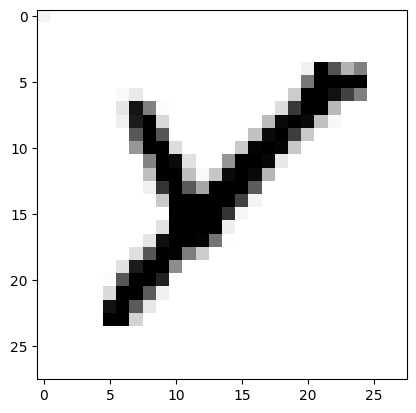

In [8]:
plt.imshow(X_test[[20]].reshape(28,28),cmap='Greys')

In [9]:
prediction=model.predict(X_test[[20]]) 
prediction

1/1 [==============================] - 0s 116ms/step


array([[3.4863365e-24, 2.7577325e-22, 3.0940535e-24, 9.5667434e-24,
        5.6675716e-15, 2.7559205e-13, 2.6567584e-26, 8.0795123e-18,
        4.7705072e-19, 8.7724161e-15, 1.8962131e-15, 8.5282072e-16,
        2.8693107e-19, 2.0498952e-16, 2.2227371e-18, 5.1974731e-12,
        1.7740156e-24, 5.3371663e-22, 2.8337836e-12, 2.0672633e-07,
        4.2846456e-20, 4.5982154e-10, 3.2689482e-14, 3.7445014e-05,
        9.9996233e-01, 1.6663498e-12]], dtype=float32)

In [10]:
alphabets="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
list1=[]
[list1.append(i) for i in range(26)]
list2=[]
[list2.append(i) for i in alphabets]
dic = dict(zip(list1, list2))
#Let's check the result.
print("The answer is",dic[np.argmax(prediction)])

The answer is Y


In [11]:
model.save(r'model_hand2.h5')

# Ignore the below code

In [ ]:
X.shape

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x = np.reshape(train_x, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x, (test_x.shape[0], 28,28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

In [ ]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

#Now we reshape the train & test image dataset so that they can be put in the model.


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

In [ ]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_yOHE, epochs=1,  validation_data = (test_X,test_yOHE))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_X, train_yOHE, epochs=2, batch_size=32, validation_data=(test_X,test_yOHE))

# Evaluate the model on the test set


In [ ]:
predictions = model.predict(test_X)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, np.argmax(predictions, axis=1))
print(f'Test accuracy: {accuracy}')

In [ ]:
model.summary()

In [ ]:
model.save(r'model_hand1.h5')

In [ ]:
import cv2
import numpy as np
import tensorflow as tf


model = tf.keras.models.load_model("C:\\Users\\aarus\\model_hand1.h5")


canvas_size = 200
canvas = np.zeros((canvas_size, canvas_size), dtype=np.uint8)
drawing = False


def draw(event, x, y, flags, param):
    global canvas, drawing
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        cv2.circle(canvas, (x, y), 10, 255, -1)  # Draw a white circle on click
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.circle(canvas, (x, y), 10, 255, -1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

# Set up OpenCV window
cv2.namedWindow('Draw Alphabet')
cv2.setMouseCallback('Draw Alphabet', draw)

while True:
    cv2.imshow('Draw Alphabet', canvas)
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):  # Press 'q' to quit
        break
    elif key == ord('p'):  # Press 'p' to predict
        # Preprocess drawn image
        resized_img = cv2.resize(canvas, (28, 28))
        normalized_img = resized_img / 255.0
        input_img = np.expand_dims(normalized_img, axis=0)
        
        # Make prediction
        predictions = model.predict(input_img)
        predicted_class = np.argmax(predictions)
        predicted_alphabet = chr(ord('A') + predicted_class)
        
        print(f'Predicted alphabet: {predicted_alphabet}')
        
        result_display = np.ones((canvas_size, canvas_size), dtype=np.uint8) * 255
        cv2.putText(result_display, f'Predicted: {predicted_alphabet}', (10, 180), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 0, 2)
        cv2.imshow('Draw Alphabet', result_display)

cv2.destroyAllWindows()

# Use this code to use openCV for entering an alphabet as an input

In [12]:
import cv2
import numpy as np
import tensorflow as tf  # Import TensorFlow for model loading and predictions

# Load your saved model
model = tf.keras.models.load_model("C:\\Users\\aarus\\model_hand2.h5")

canvas_size = 400
canvas = np.zeros((canvas_size, canvas_size), dtype=np.uint8) * 255  # Initialize canvas as white
drawing = False
font_scale = 2
font_thickness = 3
text_color = (255, 255, 255)  # Black color for drawing text

def draw_alphabet(event, x, y, flags, param):
    global canvas, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.circle(canvas, (x, y), 10, text_color, -1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.circle(canvas, (x, y), 10, text_color, -1)

cv2.namedWindow('Whiteboard')
cv2.setMouseCallback('Whiteboard', draw_alphabet)
resized_img = 0

while True:
    cv2.imshow('Whiteboard', canvas)
    
    key = cv2.waitKey(1) & 0xFF

    if key == ord('q'):  # Press 'q' to quit
        break
    if key == ord('r'):  # If 'p' is pressed, perform input image preprocessing
        if resized_img is not None:
            # Perform prediction
            resized_img = cv2.resize(canvas_copy, (28, 28))
            normalized_img = resized_img / 255.0
            input_img = np.expand_dims(normalized_img, axis=-1)
            input_img = np.expand_dims(input_img, axis=0)  # Add batch dimension
            print("Image Preprocessing is completed")
            
           
            
    elif key == ord('s'):  # Press 's' to save the snapshot and make predictions
        if resized_img is not None:
             # Make predictions using your model
            print("Starting to make prediction")
            predictions = model.predict(input_img)
            
            
            alphabets="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
            list1=[]
            [list1.append(i) for i in range(26)]
            list2=[]
            [list2.append(i) for i in alphabets]
            dic = dict(zip(list1, list2))
            #Let's check the result.
            print("The answer is",dic[np.argmax(predictions)])
            cv2.imwrite('drawing_snapshot.png', resized_img)  # Save the snapshot as 'drawing_snapshot.png'
    
    # Create an image of the current canvas
    canvas_copy = canvas.copy()

    # Display the image of the current canvas
    cv2.imshow('Drawing Snapshot', canvas_copy)

cv2.destroyAllWindows()


Image Preprocessing is completed
Starting to make prediction
1/1 [==============================] - 0s 47ms/step
The answer is b


# Use the below code to check the input image being fed for predictions

In [13]:
import cv2
import numpy as np

# Assuming input_img is your 4D array (shape: (1, 28, 28, 1))

# Remove the batch dimension
image_3d = input_img[0]

# Remove the channel dimension (assuming it's grayscale)
image_2d = image_3d[:, :, 0]

# Rescale pixel values to the original range (0 to 255)
rescaled_image = (image_2d * 255).astype(np.uint8)

# Create a blank 200x200 canvas
canvas = np.ones((200, 200), dtype=np.uint8) * 255  # Initialize canvas as white

# Calculate the position to place the input image at the center of the canvas
x_offset = (canvas.shape[1] - rescaled_image.shape[1]) // 2
y_offset = (canvas.shape[0] - rescaled_image.shape[0]) // 2

# Copy the input image onto the canvas
canvas[y_offset:y_offset + rescaled_image.shape[0], x_offset:x_offset + rescaled_image.shape[1]] = rescaled_image

# Display the canvas with the input image
cv2.imshow('Input Image on Canvas', canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Optionally, you can save the canvas as a file
cv2.imwrite('input_image_on_canvas.png', canvas)


True

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

In [ ]:
model=RandomForestClassifier()

In [ ]:
train_X=X_train[0:180000]
train_Y=y_train[0:180000]

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred[0]

In [ ]:
model.predict(X_test[0].reshape(1, -1))

In [ ]:
acc= accuracy_score(y_test, y_pred)

In [ ]:
acc

In [ ]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
